# Code for AICHIスキルシェア（Visual Recognition編）
このパートでは画像認識を行うためのAPIである、「Watson Visual Recognition」を触ってみます。ここではLanguage Translatorのデモを終えてる前提で話を進めます。

まずは、Visual Recognitionのリソースを作成します。その後、サービス資格情報から以下の情報を入力します。

In [1]:
API_KEY='DtImtxG68R1KHtJPyzxHaQuTwwXdB7fy8iyLqRDphQP-'
API_URL='https://gateway.watsonplatform.net/visual-recognition/api'

次に下記のセルを実行し、Watson APIのpython SDKをダウンロードします。

In [2]:
!pip install --upgrade "ibm-watson>=3.0.3"

Requirement already up-to-date: ibm-watson>=3.0.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (3.0.4)
Requirement not upgraded as not directly required: python-dateutil>=2.5.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ibm-watson>=3.0.3) (2.6.1)
Requirement not upgraded as not directly required: websocket-client==0.48.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ibm-watson>=3.0.3) (0.48.0)
Requirement not upgraded as not directly required: ibm-cloud-sdk-core>=0.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ibm-watson>=3.0.3) (0.5.1)
Requirement not upgraded as not directly required: requests<3.0,>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ibm-watson>=3.0.3) (2.18.4)
Requirement not upgraded as not directly required: six>=1.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from python-dateutil>=2.5.3->ibm-watson>=3.0.3) (1.11.0)
Requirement not upgraded as not d

下記のセルを実行し実際にAPIを呼び出します。versionの項目は特に指定がなければ、 https://cloud.ibm.com/apidocs/visual-recognition?code=python#versioning を確認し、最新バージョンを指定しましょう。（2019年6月現在は```2018-03-19```が最新バージョンです）

In [3]:
from ibm_watson import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    iam_apikey=API_KEY
)

ここまでで準備ができました。では、次からは画像認識をやっていきます。

## 1. 画像認識（一般モデル）-URLを指定する-
事前学習済みの分類器を使った出力します。一般モデルでは、数千種類の様々なクラス・キーワードから該当するものを識別します。いわゆる画像へのタグ付けです。クラス・キーワード（タグ）は、階層的にカテゴライズされていて、最上位カテゴリーとしては、動物、 人間および個人とそのアクティビティ、食品、植物、スポーツ、自然、運輸、家具、フルーツ、楽器、工具、色、装置・機器、武器、建物、構造物・人工物、衣類等々があります。（参考：https://cloud.ibm.com/apidocs/visual-recognition?code=python#classify-images ）
- 入力：認識させたい画像ファイル（jpegかpng）またはURL
- 出力
 - 画像に写っているもの、分類結果
 - スコア（画像の確信度）
 - もの・分類結果の階層構造 (動物-家畜-犬-小型犬･･･といったタグの階層)

まずはサンプル画像のURLから画像認識をやっていきます（[このリンクの画像](https://watson-developer-cloud.github.io/doc-tutorial-downloads/visual-recognition/fruitbowl.jpg)を使います）。下記のセルを実行しましょう。

In [4]:
image_url = 'https://watson-developer-cloud.github.io/doc-tutorial-downloads/visual-recognition/fruitbowl.jpg'

import json

classes = visual_recognition.classify(
        url=image_url,
        threshold='0.6',
        accept_language='ja').get_result()
print(json.dumps(classes, indent=2,  ensure_ascii=False))

{
  "images_processed": 1,
  "custom_classes": 0,
  "images": [
    {
      "classifiers": [
        {
          "classes": [
            {
              "class": "果実",
              "score": 0.788
            },
            {
              "class": "オリーブ色",
              "score": 0.973
            },
            {
              "class": "レモン・イエロー (色)",
              "score": 0.789
            }
          ],
          "name": "default",
          "classifier_id": "default"
        }
      ],
      "resolved_url": "https://watson-developer-cloud.github.io/doc-tutorial-downloads/visual-recognition/fruitbowl.jpg",
      "source_url": "https://watson-developer-cloud.github.io/doc-tutorial-downloads/visual-recognition/fruitbowl.jpg"
    }
  ]
}


どうですか？JSONの形式で結果が出力されたと思います。さらにその結果が日本語で出力されていることが分かるかと思います。これは```accept_language```で言語のIDを指定することで出力されます。指定できる言語は11言語でデフォルトは```en```です。

## 2. 画像認識（一般モデル）-自前で用意する-
では、今度は自前で用意した画像を読み込ませる作業を行います。皆さんのPC上に保存されている画像をなんでもいいので用意してください。（ない場合は[こちらの画像](https://github.com/Miura55/20190625_SkillShare/blob/master/img/ramen.jpeg)をご自分のPCにインストールしてください。）
用意したら、Watson Studioで画像を取り込む作業を行う必要があります。以下の作業を行います。

1. 右上のアイコンの中から正方形が3つと数字の１で構成されたアイコンを探し、クリックします。
2. ```files```タブを選択されていることを確認し、画像を```Drop your file here or browse your files to add a new file```にドラッグ＆ドロップするか、```browse```をクリックして画像ファイルを選択します。
3. 下記のセルをクリックし、```Insert to code```を選択し、```Insert StreamingBody object```をクリックしてファイルを読み込むためのコードを生成します。
4. このとき、下の方の整数が```streaming_body_1```ではなく、```streaming_body_2```になっている場合は、```streaming_body_1```に修正してください。

In [5]:
# The code was removed by Watson Studio for sharing.

コードが生成できたら、今度は画像をストレージに保存することなくプログラム上だけで処理できるようにファイルのコピーを行います。下のセルを実行してください。

In [6]:
from io import BytesIO

filename = "ramen.jpeg"
file = BytesIO(streaming_body_1.read())
with open(filename, "wb") as out:
    out.write(file.read())

画像のコピーが出来ているか確認するために実際に画像を表示させてみます。下のセルを実行してください。

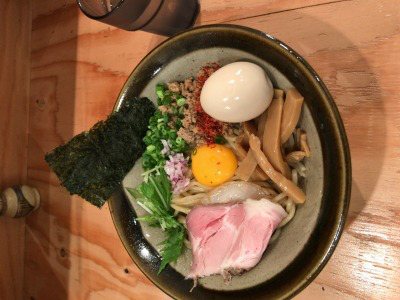

In [7]:
from PIL import Image

# 画像が読み込めたかを確認
with open(filename, 'rb') as images_file:
    image = Image.open(filename)
    display(image)

いよいよ読み込んだ画像を認識していきます。下記のセルを実行してください。

In [8]:
with open(filename, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.6',
       accept_language='ja').get_result()
    print(json.dumps(classes, indent=2, ensure_ascii=False))

{
  "images_processed": 1,
  "custom_classes": 0,
  "images": [
    {
      "classifiers": [
        {
          "classes": [
            {
              "class": "ニース風サラダ",
              "score": 0.681,
              "type_hierarchy": "/食物/栄養/料理/サラダ/ニース風サラダ"
            },
            {
              "class": "サラダ",
              "score": 0.681
            },
            {
              "class": "料理",
              "score": 0.95
            },
            {
              "class": "栄養",
              "score": 0.95
            },
            {
              "class": "食物",
              "score": 0.95
            },
            {
              "class": "クロック・マダム",
              "score": 0.663,
              "type_hierarchy": "/食物/栄養/料理/クロック・マダム"
            },
            {
              "class": "緑がかった色",
              "score": 0.749
            }
          ],
          "name": "default",
          "classifier_id": "default"
        }
      ],
      "image": "ramen.jpeg"
    }
  ]
}


## 3. もう少し見やすくしてみる
ここまでで画像を読み込んで認識させる結果を見てきました。しかし、出力されるものがJSONであるため結果を見るには少し見づらいです。そこでpandasを使って表を出力することと、matplotlibを使用してグラフを表示していくことをやっていきます。pandasとは、表形式のデータの取扱を行うためのpythonライブラリで、matplotlibとは、グラフを作成するために使用されるpyhonライブラリです。先程出力したjsonファイルのうち、```class```要素をx軸のラベルにつけたいですが、日本語を入れるには別途フォントをインストールする必要があります。まずは下記のセルを実行し、日本語のフォントファイルをインストールします。

In [9]:
import os

#日本語フォントの導入  
jp_font_path ='ipaexg00301/ipaexg.ttf'

if not os.path.exists(jp_font_path):
    !wget https://oscdl.ipa.go.jp/IPAexfont/ipaexg00301.zip
    !unzip ipaexg00301.zip
else:
    print('IPA font haｓ been already installed')


--2019-06-23 08:28:28--  https://oscdl.ipa.go.jp/IPAexfont/ipaexg00301.zip
Resolving oscdl.ipa.go.jp (oscdl.ipa.go.jp)... 192.218.88.241
Connecting to oscdl.ipa.go.jp (oscdl.ipa.go.jp)|192.218.88.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4017822 (3.8M) [application/zip]
Saving to: ‘ipaexg00301.zip’

100%[======================================>] 4,017,822    761KB/s   in 5.4s   

2019-06-23 08:28:35 (733 KB/s) - ‘ipaexg00301.zip’ saved [4017822/4017822]

Archive:  ipaexg00301.zip
   creating: ipaexg00301/
  inflating: ipaexg00301/ipaexg.ttf  
  inflating: ipaexg00301/IPA_Font_License_Agreement_v1.0.txt  
  inflating: ipaexg00301/Readme_ipaexg00301.txt  


インストールを終えたら、下記のセルを実行し認識結果をグラフで表示します。(もし何もグラフが表示されない場合はもう一回セルを実行してみるとグラフが表示されると思います。)

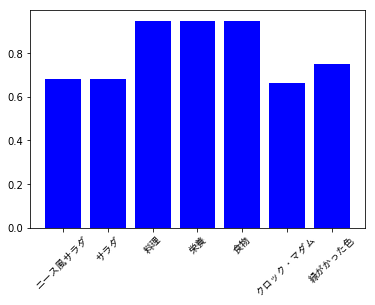

,score
ニース風サラダ,0.681
サラダ,0.681
料理,0.950
栄養,0.950
食物,0.950
クロック・マダム,0.663
緑がかった色,0.749


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname=jp_font_path, size=10)

# 値を設定
values = [value for value in classes["images"][0]["classifiers"][0]["classes"]]
label = [label["class"] for label in values]
plt.xticks(range(len(values)), label, fontproperties=fp, rotation=45)

# グラフを表示
plt.bar(range(len(values)), [score["score"] for score in values], color="blue")
plt.show()

# 結果一覧を表示
df_face_detect_res = pd.DataFrame({"score":[score["score"] for score in values]},
                                 index=label)
display(df_face_detect_res)

pandasやmatplotlibを使うとこのようにデータの可視化を容易にできます。そして、jupyter-notebook上で使用することで、実行したセルの下にそのまま表示してくれます。データサイエンスでjupyter-notebookとの相性がいい理由はこのようにデータを可視化しやすくするための環境が整っているからということもあります。

## 3. 顔認識にチャレンジ
ここまでは物体認識の話を取り上げてきましたが、ここからは人の顔を認識することをやっていきます。Visual Recognitionには顔認識専用のモデルもデフォルトに存在し、顔の位置、年齢、性別などを判定してくれます。それでは、下記のセルを実行し、画像のインストールと使う画像を見ていきます。今回の画像はネットで見つけたフリー素材です。（リンクが無効になって使えなくなる可能性があります）

--2019-06-23 08:41:06--  https://skybiometry.com/wp-content/uploads/2015/09/work-2-1-e1451907791984.jpg
Resolving skybiometry.com (skybiometry.com)... 166.62.110.232
Connecting to skybiometry.com (skybiometry.com)|166.62.110.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87792 (86K) [image/jpeg]
Saving to: ‘people.jpg’

100%[======================================>] 87,792       364KB/s   in 0.2s   

2019-06-23 08:41:06 (364 KB/s) - ‘people.jpg’ saved [87792/87792]



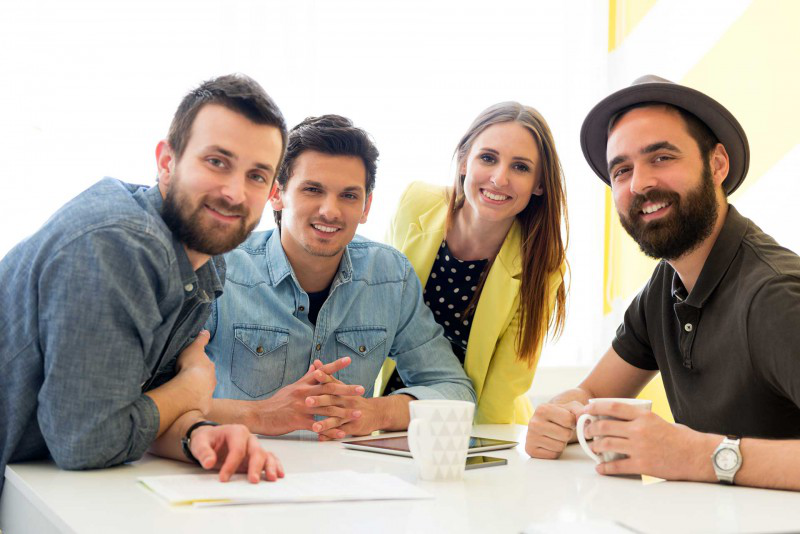

In [12]:
!wget https://skybiometry.com/wp-content/uploads/2015/09/work-2-1-e1451907791984.jpg -O people.jpg

with open("./people.jpg", "rb"):
    image = Image.open("./people.jpg")
    display(image)      

それでは、インストールした画像を実際に認識させてみましょう。下記のセルを実行します。

In [13]:
with open('./people.jpg', 'rb') as images_file:
    faces = visual_recognition.detect_faces(images_file).get_result()
print(json.dumps(faces, indent=2))

{
  "images_processed": 1,
  "images": [
    {
      "faces": [
        {
          "age": {
            "score": 0.904979,
            "min": 28,
            "max": 31
          },
          "face_location": {
            "left": 600,
            "height": 141,
            "width": 120,
            "top": 115
          },
          "gender": {
            "score": 0.9999989,
            "gender_label": "male",
            "gender": "MALE"
          }
        },
        {
          "age": {
            "score": 0.99970275,
            "min": 28,
            "max": 31
          },
          "face_location": {
            "left": 165,
            "height": 138,
            "width": 114,
            "top": 120
          },
          "gender": {
            "score": 0.9999981,
            "gender_label": "male",
            "gender": "MALE"
          }
        },
        {
          "age": {
            "score": 0.87041277,
            "min": 21,
            "max": 24
          },
        

なんとなく認識されていることが分かりますがこれでは、どの顔がどのように認識されているのかわかりません。そこで画像に印をつけて顔認識結果がわかるように下記の関数を定義します。

In [14]:
from PIL import Image, ImageDraw,ImageFont
import os

def draw_face_area(image_file, face_detect_res):
    
    if  len(face_detect_res) < 1:
        print('No face detection')
        return        
    
    image = Image.open(image_file)
    draw = ImageDraw.Draw(image, "RGBA")
    #日本語フォントの導入  
    jp_font_path ='ipaexg00301/ipaexg.ttf'

    if not os.path.exists(jp_font_path):
        !wget https://oscdl.ipa.go.jp/IPAexfont/ipaexg00301.zip
        !unzip ipaexg00301.zip
    else:
        print('IPA font haｓ been already installed')
    
    col_name =  ["gender", "gender_score", "age_max", "age_min", "age_score"]
    df_face_detect_res = pd.DataFrame(columns=[])
  
    for i, faceinfo in enumerate(face_detect_res):
        x0 = faceinfo['face_location']['left']
        x1= x0 +  faceinfo['face_location']['width']
        y0 = faceinfo['face_location']['top']
        y1 = y0 + faceinfo['face_location']['height']
        
        
        df_face_detect_res.loc[i, "gender"] = faceinfo['gender']['gender']
        df_face_detect_res.loc[i, "gender_score"] = faceinfo['gender']['score']
        df_face_detect_res.loc[i, "age_max"] = faceinfo['age']['max']
        df_face_detect_res.loc[i, "age_min"] = faceinfo['age']['min']
        df_face_detect_res.loc[i, "age_score"] = faceinfo['age']['score']
        
        font_size = 20
        font = ImageFont.truetype(jp_font_path, font_size)
        text_size = draw.textsize('88', font=font)
        if not ( x1-x0 < text_size[0] or y1-y0 < text_size[1]):
            while x1-x0 > text_size[0] or y1-y0 > text_size[1]:
                font = ImageFont.truetype(jp_font_path, font_size)
                text_size = draw.textsize('88', font=font)
                font_size += 1
            
        font = ImageFont.truetype(jp_font_path, font_size)
        draw.rectangle(xy=(x0,y0, x1, y1), outline=(0, 249, 0))
        draw.text(xy=(x0+5,y0+5), text=str(i), fill=(0, 249, 0), font=font)
        
    display(image)
    pd.options.display.max_rows = None
    display(df_face_detect_res)

関数を定義して以下のセルを実行します。画像上で認識された顔に番号が振られ、更に性別、大体の年齢、それぞれのスコアを表で出力されます。

IPA font haｓ been already installed


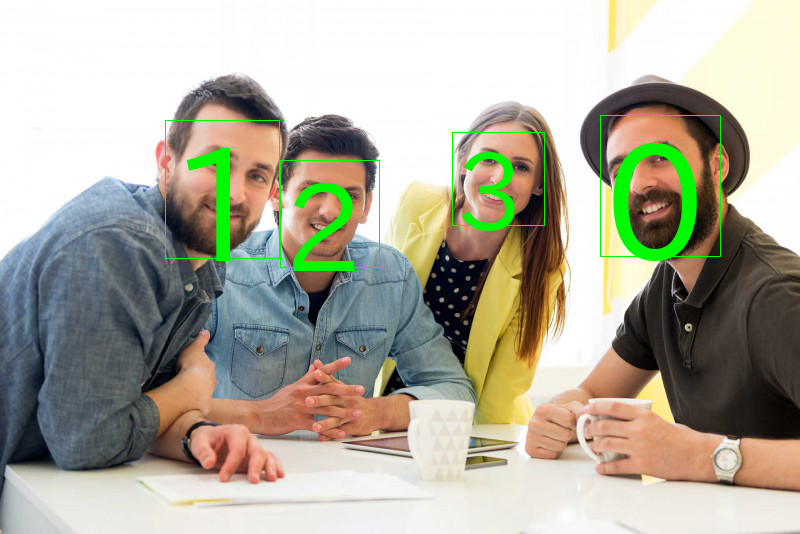

,gender,gender_score,age_max,age_min,age_score
0,MALE,0.999999,31.0,28.0,0.904979
1,MALE,0.999998,31.0,28.0,0.999703
2,MALE,0.999991,24.0,21.0,0.870413
3,FEMALE,1.000000,26.0,23.0,0.799689


In [15]:
draw_face_area('people.jpg', faces['images'][0]['faces'])

# 課題
それでは、最後にご自分で画像を用意して顔認識を行ってください。パソコンに保管されているものでもオンラインにあるものでも大丈夫ですが、それぞれで必要な処理がありますので、忘れずに行ってください。プログラムはこの下にセルを追加していきましょう

最後に右上にあるフロッピーディスクマークをクリックしてプログラムを保存したら、このパートは終了です。